In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [0]:
df=pd.read_excel('/content/drive/My Drive/Projects/CocaCola_Sales_Rawdata.xlsx')

In [0]:
#check for null values
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [0]:
df['Quarter'].unique()

array(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87',
       'Q4_87', 'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89',
       'Q3_89', 'Q4_89', 'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91',
       'Q2_91', 'Q3_91', 'Q4_91', 'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92',
       'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93', 'Q1_94', 'Q2_94', 'Q3_94',
       'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95', 'Q1_96', 'Q2_96'],
      dtype=object)

we have 9 year and two Quarter (6 months) data

In [0]:
df.shape

(42, 2)

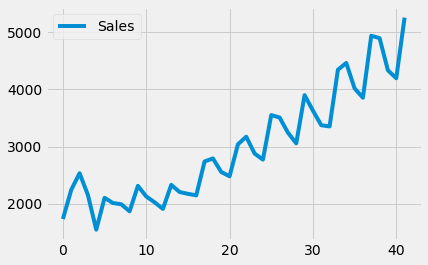

In [0]:
df.plot()

we can clearly see the cocacola consumptions are increasing Quarter by Quarter therefore upward trend is there.

it seems like maximum cocacola consumptions are occured by first Quarter of every year because of summer (hotness)

In [0]:
# convert categorical into dummy variables
new_data=pd.get_dummies(df,drop_first=True)

In [0]:
# data validation
size=int(len(df)*0.8)
train=new_data[:size]
test=new_data[size:]

In [0]:
X_train,y_train=train.drop('Sales',axis=1),train['Sales']
X_test,y_test=test.drop('Sales',axis=1),test['Sales']

In [0]:
print('X_train size',X_train.shape)
print('X_test size',X_test.shape)
print('y_train size',y_train.shape)
print('y_test size',y_test.shape)

X_train size (33, 41)
X_test size (9, 41)
y_train size (33,)
y_test size (9,)


In [0]:
# lets go for Linear regression
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

Rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE Score :',Rmse)


RMSE Score : 2775.655200046872


Text(0.5, 1.0, 'Linear Regression Prediction with RMSE Score 2775.66')

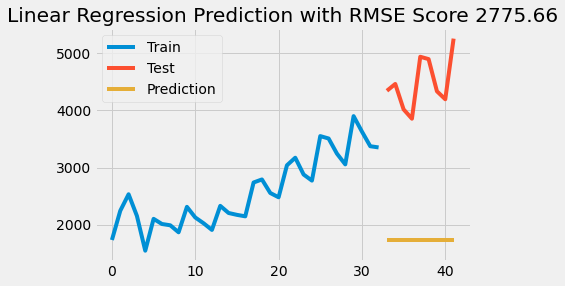

In [0]:
#plot
test['Predictions'] = 0
test['Predictions'] = y_pred

test.index = new_data.iloc[size:].index
train.index = new_data.iloc[:size].index

plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(test['Predictions'],label='Prediction')
plt.legend()
plt.title('Linear Regression Prediction with RMSE Score {:.2f}'.format(Rmse))

In [0]:
# look for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(X_train,y_train)
y_pred=random.predict(X_test)

Rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE Score :',Rmse)


RMSE Score : 2574.3785948804434


Text(0.5, 1.0, 'Random Forest Regression Prediction with RMSE Score 2574.38')

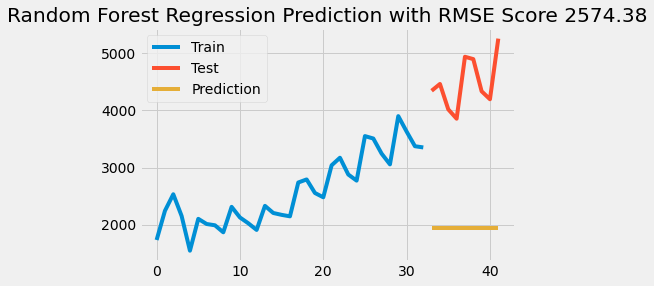

In [0]:
test['Predictions'] = 0
test['Predictions'] = y_pred

test.index = new_data.iloc[size:].index
train.index = new_data.iloc[:size].index

plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(test['Predictions'],label='Prediction')
plt.legend()
plt.title('Random Forest Regression Prediction with RMSE Score {:.2f}'.format(Rmse))

we can see there is no significant change

lets move to the auto_arima model

In [0]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 4.6MB/s 


In [0]:
from pyramid import auto_arima
model=auto_arima(train['Sales'],trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train["Sales"])

forecast=model.predict(n_periods=len(test))

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=452.324, BIC=461.118, Fit time=0.255 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=470.044, BIC=472.975, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=471.252, BIC=475.649, Fit time=0.060 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=463.750, BIC=468.147, Fit time=0.076 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=464.236, BIC=471.565, Fit time=0.174 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=436.133, BIC=446.393, Fit time=0.287 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=438.305, BIC=447.099, Fit time=0.270 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=439.126, BIC=450.852, Fit time=0.329 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=457.856, BIC=465.185, Fit time=0.166 seconds
Fit ARIMA: order=(4, 1, 3) seasonal_order=(0, 0, 0, 1);

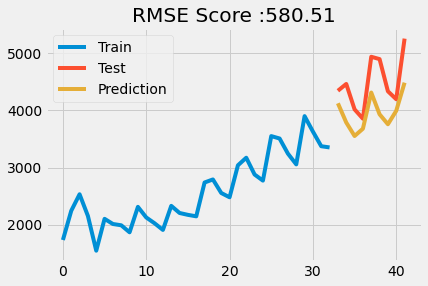

In [0]:

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.title('RMSE Score :{:.2f}'.format(np.sqrt(mean_squared_error(test['Sales'],forecast))))
plt.show()

auto arima working better as compare to regression models

lets go for LSTM deep learning concepts

In [0]:
from keras.layers import LSTM,Dense,Flatten,Dropout,Bidirectional
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


Epoch 1/100
 - 1s - loss: 0.0824
Epoch 2/100
 - 0s - loss: 0.0416
Epoch 3/100
 - 0s - loss: 0.0207
Epoch 4/100
 - 0s - loss: 0.0172
Epoch 5/100
 - 0s - loss: 0.0168
Epoch 6/100
 - 0s - loss: 0.0151
Epoch 7/100
 - 0s - loss: 0.0143
Epoch 8/100
 - 0s - loss: 0.0135
Epoch 9/100
 - 0s - loss: 0.0123
Epoch 10/100
 - 0s - loss: 0.0114
Epoch 11/100
 - 0s - loss: 0.0108
Epoch 12/100
 - 0s - loss: 0.0102
Epoch 13/100
 - 0s - loss: 0.0094
Epoch 14/100
 - 0s - loss: 0.0093
Epoch 15/100
 - 0s - loss: 0.0090
Epoch 16/100
 - 0s - loss: 0.0097
Epoch 17/100
 - 0s - loss: 0.0090
Epoch 18/100
 - 0s - loss: 0.0086
Epoch 19/100
 - 0s - loss: 0.0091
Epoch 20/100
 - 0s - loss: 0.0088
Epoch 21/100
 - 0s - loss: 0.0089
Epoch 22/100
 - 0s - loss: 0.0096
Epoch 23/100
 - 0s - loss: 0.0087
Epoch 24/100
 - 0s - loss: 0.0088
Epoch 25/100
 - 0s - loss: 0.0087
Epoch 26/100
 - 0s - loss: 0.0090
Epoch 27/100
 - 0s - loss: 0.0090
Epoch 28/100
 - 0s - loss: 0.0090
Epoch 29/100
 - 0s - loss: 0.0086
Epoch 30/100
 - 0s - lo

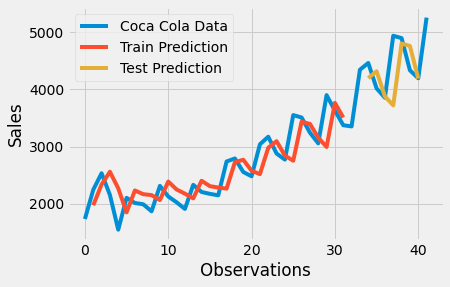

In [0]:

def create_dataset(dataset, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)


data = "/content/drive/My Drive/Projects/CocaCola_Sales_Rawdata.xlsx"

np.random.seed(7)

df = pd.read_excel(data, usecols=[1])
df = df.dropna()
dataset = df.values
dataset = dataset.astype("float32")

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_dataset = dataset[:int(len(dataset)*0.8), :]
test_dataset = dataset[int(len(dataset)*0.8):, :]

lookback = 1
trainX, trainY = create_dataset(train_dataset, lookback)
testX, testY = create_dataset(test_dataset, lookback)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(Bidirectional(LSTM(20,return_sequences=True, input_shape=(1, lookback))))
model.add(LSTM(20))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset) 
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Coca Cola Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Sales")
plt.legend()
plt.show()



we can see LSTM works nice as compare to arima and prophet model.

deep learning is always hungry for data so add more data for good predictions.

In [0]:
trainPredictPlot

array([[      nan],
       [1973.9025],
       [2337.3164],
       [2560.1836],
       [2270.3726],
       [1850.5288],
       [2233.298 ],
       [2168.2014],
       [2152.0432],
       [2065.7239],
       [2389.201 ],
       [2250.785 ],
       [2177.1409],
       [2094.7036],
       [2402.559 ],
       [2308.5984],
       [2284.409 ],
       [2265.4478],
       [2726.009 ],
       [2770.098 ],
       [2577.815 ],
       [2518.518 ],
       [2978.6562],
       [3094.001 ],
       [2842.0664],
       [2752.931 ],
       [3434.5083],
       [3395.8413],
       [3157.3342],
       [2992.8677],
       [3763.088 ],
       [3507.7666],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan]], dtype=float32)

In [0]:
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [4196.6997],
       [4315.847 ],
       [3876.9182],
       [3720.0256],
       [4800.249 ],
       [4757.966 ],
       [4187.73  ],
       [      nan]], dtype=float32)

In [0]:
scaler.inverse_transform(dataset)

array([[1734.827 ],
       [2244.961 ],
       [2533.805 ],
       [2154.963 ],
       [1547.819 ],
       [2104.412 ],
       [2014.3629],
       [1991.747 ],
       [1869.05  ],
       [2313.632 ],
       [2128.32  ],
       [2026.829 ],
       [1910.604 ],
       [2331.165 ],
       [2206.55  ],
       [2173.968 ],
       [2148.278 ],
       [2739.308 ],
       [2792.754 ],
       [2556.01  ],
       [2480.974 ],
       [3039.523 ],
       [3172.116 ],
       [2879.001 ],
       [2772.    ],
       [3550.0002],
       [3508.0002],
       [3243.86  ],
       [3056.    ],
       [3899.    ],
       [3629.    ],
       [3373.    ],
       [3352.    ],
       [4342.    ],
       [4461.    ],
       [4016.9998],
       [3854.    ],
       [4936.    ],
       [4895.    ],
       [4333.    ],
       [4194.    ],
       [5253.    ]], dtype=float32)